In [1]:
import pandas as pd

# Lire ton fichier Excel
df = pd.read_excel("BMGs-2024.xlsx")

# Afficher les 10 premières lignes pour comprendre
print(df.head(10))

   Unnamed: 0                   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0         NaN                          NaN        NaN        NaN        NaN   
1         NaN          Alloys (compostion)      Tg(K)      Tx(K)      Tl(K)   
2         NaN  Ag30.8 Ca30.8 Mg23.1 Cu15.4        413        432        803   
3         NaN         Ag38.4 Mg30.8 Ca30.8        394        426        805   
4         NaN     Ag38.5 Ca30.8 Mg23 Cu7.7        384        416        854   
5         NaN   Ag38.5 Mg38.5 Ca15.4 Cu7.7        405        436        842   
6         NaN         Ag46.2 Ca30.7 Mg23.1        399        426        765   
7         NaN     Ag46.2 Mg23.2 Ca23 Cu7.7        398        430        825   
8         NaN     Ag50 Ca30.8 Mg11.5 Cu7.7        452        487        809   
9         NaN    Ag53.8 Ca30.5 Mg7.7 Cu7.7        428        488        843   

  Unnamed: 5  Unnamed: 6                  Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0        NaN         NaN                         NaN

In [2]:
import pandas as pd

# Charger le fichier Excel
xls = pd.ExcelFile("BMGs-2024.xlsx")

# Lire toutes les feuilles et concaténer
df_all = pd.concat([xls.parse(sheet_name) for sheet_name in xls.sheet_names], ignore_index=True)

# Supprimer les lignes entièrement vides
df_all.dropna(how="all", inplace=True)

# Extraire les deux tableaux
df1 = df_all.iloc[1:][['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df1.columns = ['Alloys', 'Tg', 'Tx', 'Tl', 'Dmax']
df1 = df1[df1['Alloys'].notna() & (df1['Alloys'] != 'Alloys')]

df2 = df_all.iloc[1:][['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']]
df2.columns = ['Alloys', 'Tg', 'Tx', 'Tl', 'Dmax']
df2 = df2[df2['Alloys'].notna() & (df2['Alloys'] != 'Alloys')]

# Fusionner simplement les deux tableaux
df_combined = pd.concat([df1, df2], ignore_index=True)

# Sauvegarder sans faire de nettoyage
df_combined.to_excel("BMGs_fusion.xlsx", index=False)
print("✅ Deux tableaux fusionnés et sauvegardés dans : BMGs_fusion.xlsx")

✅ Deux tableaux fusionnés et sauvegardés dans : BMGs_fusion.xlsx


In [3]:
import pandas as pd

# Charger le fichier fusionné
df = pd.read_excel("BMGs_fusion.xlsx")

# Supprimer les espaces en ignorant les valeurs manquantes
df['Alloys'] = df['Alloys'].astype(str).str.replace(" ", "", regex=False)

# Sauvegarder le résultat dans un nouveau fichier
df.to_excel("BMGs_no_spaces2.xlsx", index=False)
print("✅ Fichier sauvegardé sous : BMGs_no_spaces2.xlsx")

✅ Fichier sauvegardé sous : BMGs_no_spaces2.xlsx


In [4]:
import pandas as pd
import re

# Fonction de traitement avec priorités corrigées
def flatten_alloy(comp):
    comp = str(comp).replace(" ", "")

    def expand_group(match, factor):
        group = match.group(1)
        pattern = r"([A-Z][a-z]*)(\d+(?:\.\d+)?)"
        expanded = [f"{el}{float(pct)*factor/100:.6f}" for el, pct in re.findall(pattern, group)]
        return " ".join(expanded)

    def process(expr):
        # Appliquer les priorités dans le bon ordre : (), [], {}
        for pattern in [r"\(([^\(\)]+)\)(\d+(?:\.\d+)?)", 
                        r"\[([^\[\]]+)\](\d+(?:\.\d+)?)", 
                        r"\{([^\{\}]+)\}(\d+(?:\.\d+)?)"]:
            while re.search(pattern, expr):
                expr = re.sub(pattern, lambda m: expand_group(m, float(m.group(2))), expr)
        return expr

    return process(comp)

# Charger le fichier
df = pd.read_excel("BMGs_no_spaces2.xlsx")

# Récupérer la ligne 133 (index 132)
index = 132
original = df.loc[index, "Alloys"]
processed = flatten_alloy(original)

# Afficher les résultats
print(f"🔹 Ligne 133 - Composition originale :\n{original}")
print(f"\n✅ Résultat après traitement :\n{processed}")

🔹 Ligne 133 - Composition originale :
{[(Fe60Co40)75B20Si5]96Nb4}99Cr1

✅ Résultat après traitement :
Fe42.768000 Co28.512000 B19.008000 Si4.752000 Nb3.960000Cr1


In [5]:
import pandas as pd
import re

def flatten_alloy(comp):
    comp = str(comp).replace(" ", "")

    def expand_group(match, factor):
        group = match.group(1)
        pattern = r"([A-Z][a-z]*)(\d+(?:\.\d+)?)"
        expanded = [f"{el}{float(pct) * factor / 100:.6f}" for el, pct in re.findall(pattern, group)]
        return " ".join(expanded)

    def process(expr):
        # Priorité : () → [] → {}
        patterns = [
            r"\(([^\(\)]+)\)(\d+(?:\.\d+)?)",
            r"\[([^\[\]]+)\](\d+(?:\.\d+)?)",
            r"\{([^\{\}]+)\}(\d+(?:\.\d+)?)",
        ]
        for pattern in patterns:
            while re.search(pattern, expr):
                expr = re.sub(pattern, lambda m: expand_group(m, float(m.group(2))), expr)
        return expr

    return process(comp)

# Charger le fichier
df = pd.read_excel("BMGs_no_spaces2.xlsx")

# Appliquer à toute la colonne
df["Alloys"] = df["Alloys"].apply(flatten_alloy)

# Sauvegarder le fichier avec les résultats
df.to_excel("BMGs_expanded.xlsx", index=False)
print("✅ Traitement terminé. Fichier sauvegardé sous : BMGs_expanded.xlsx")

✅ Traitement terminé. Fichier sauvegardé sous : BMGs_expanded.xlsx


In [19]:
import re

def is_valid_alloy_format(comp):
    # Doit contenir uniquement des paires (élément chimique + nombre)
    pattern = r'^([A-Z][a-z]?\d+(\.\d+)?)+$'
    return bool(re.match(pattern, comp.replace(" ", "")))

# Appliquer sur toutes les lignes
df['Valid_Format'] = df['Alloys'].apply(is_valid_alloy_format)

# Afficher les lignes invalides
invalid_rows = df[df['Valid_Format'] == False]
print(invalid_rows[['Alloys']])

                                            Alloys
128                   Fe58MoB111:L14514C15B6Cr5Er2
346  Ti0.450000 Cu0.378000 Zr0.100000 Ni0.072000Sn


In [6]:
import pandas as pd
import re

# Charger le fichier
df = pd.read_excel("BMGs_expanded.xlsx")

# Fonction pour extraire les éléments chimiques et leurs pourcentages
def extract_elements(comp):
    comp = str(comp).replace(" ", "")
    elements = re.findall(r"([A-Z][a-z]*)(\d+(?:\.\d+)?)", comp)
    return {el: float(pct) for el, pct in elements}

# Extraire les éléments pour chaque ligne et créer une colonne par élément
all_elements = set()

# Extraire tous les éléments chimiques présents dans la colonne 'Alloys'
df["elements_dict"] = df["Alloys"].apply(extract_elements)

# Créer un ensemble d'éléments uniques
for alloy in df["elements_dict"]:
    all_elements.update(alloy.keys())

# Créer une nouvelle colonne pour chaque élément chimique
for element in all_elements:
    df[element] = df["elements_dict"].apply(lambda x: x.get(element, 0))

# Supprimer la colonne 'elements_dict' car elle n'est plus nécessaire
df.drop(columns=["elements_dict"], inplace=True)

# Sauvegarder le fichier avec les colonnes des éléments
df.to_excel("BMGs_elements.xlsx", index=False)
print("✅ Traitement terminé. Fichier sauvegardé sous : BMGs_elements.xlsx")

# Afficher un aperçu
print(df.head())

✅ Traitement terminé. Fichier sauvegardé sous : BMGs_elements.xlsx
                     Alloys     Tg     Tx     Tl  Dmax   Mo    Cu   Au   Ti  \
0  Ag30.8Ca30.8Mg23.1Cu15.4  413.0  432.0  803.0   2.5  0.0  15.4  0.0  0.0   
1        Ag38.4Mg30.8Ca30.8  394.0  426.0  805.0   0.5  0.0   0.0  0.0  0.0   
2     Ag38.5Ca30.8Mg23Cu7.7  384.0  416.0  854.0   2.0  0.0   7.7  0.0  0.0   
3   Ag38.5Mg38.5Ca15.4Cu7.7  405.0  436.0  842.0   0.5  0.0   7.7  0.0  0.0   
4        Ag46.2Ca30.7Mg23.1  399.0  426.0  765.0   0.7  0.0   0.0  0.0  0.0   

    Hf  ...   Ta   Gd   Mn   Ga    C   Al   Nb   In    Ag   Tb  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  30.8  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  38.4  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  38.5  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  38.5  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  46.2  0.0  

[5 rows x 50 columns]


In [22]:
# Colonnes initiales à ignorer
initial_columns = {'Alloys', 'Tg', 'Tx', 'Tl', 'Dmax'}

# Déduire les éléments chimiques extraits
element_columns = [col for col in df.columns if col not in initial_columns]

# Afficher tous les éléments chimiques extraits
print("🧪 Éléments chimiques présents dans le fichier :")
print(sorted(element_columns))

🧪 Éléments chimiques présents dans le fichier :
['Ag', 'Al', 'Au', 'B', 'Be', 'C', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Fe', 'Ga', 'Gd', 'Hf', 'Ho', 'In', 'L', 'La', 'Mg', 'Mm', 'Mn', 'Mo', 'Nb', 'Nd', 'Ni', 'P', 'Pd', 'Pr', 'S', 'Sc', 'Si', 'Sm', 'Sn', 'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Zn', 'Zr']


In [7]:
# Liste des éléments chimiques officiels de la table périodique (jusqu'à l'Oganesson)
periodic_table_elements = {
    'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar',
    'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr',
    'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd',
    'In', 'Sn', 'Sb', 'Te', 'I', 'Xe',
    'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
    'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn',
    'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr',
    'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'
}

# Liste des éléments extraits de ton fichier
extracted_elements = ['Ag', 'Al', 'Au', 'B', 'Be', 'C', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Fe', 'Ga',
                      'Gd', 'Hf', 'Ho', 'In', 'L', 'La', 'Mg', 'Mm', 'Mn', 'Mo', 'Nb', 'Nd', 'Ni', 'P', 'Pd',
                      'Pr', 'S', 'Sc', 'Si', 'Sm', 'Sn', 'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Zn', 'Zr']

# Conversion en set pour comparaison
extracted_set = set(extracted_elements)

# Élément(s) non valides = présents dans le fichier mais pas dans la table périodique
invalid_elements = extracted_set - periodic_table_elements

# Affichage
print("⛔ Éléments non valides (absents de la table périodique) :", sorted(invalid_elements))

⛔ Éléments non valides (absents de la table périodique) : ['L', 'Mm']


In [8]:
import pandas as pd
import re

# Charger le fichier
df = pd.read_excel("BMGs_elements.xlsx")

# Liste des éléments chimiques non valides
invalid_elements = ['L', 'Mm']

# Fonction pour extraire les éléments chimiques de l'alliage
def extract_elements_only(comp):
    comp = str(comp).replace(" ", "")
    elements = re.findall(r"([A-Z][a-z]*)\d*", comp)
    return elements

# Identifier les lignes contenant au moins un élément invalide
def contains_invalid_elements(comp):
    elements = extract_elements_only(comp)
    return any(el in invalid_elements for el in elements)

# Filtrer les lignes contenant des éléments invalides
invalid_rows = df[df["Alloys"].apply(contains_invalid_elements)]

# Affichage
print("🔍 Lignes contenant des éléments invalides :")
print(invalid_rows)

🔍 Lignes contenant des éléments invalides :
                           Alloys     Tg     Tx      Tl  Dmax   Mo   Cu  Au  \
128  Fe58MoB111:L14514C15B6Cr5Er2  793.0  829.0  1416.0   6.0  0.0  0.0   0   
685      Mm51.2Al23.2Cu9.3Ni9.3C7  507.7  581.5   985.0  10.0  0.0  9.3   0   

      Ti   Hf  ...   Ta   Gd  Mn   Ga     C    Al   Nb  In   Ag   Tb  
128  0.0  0.0  ...  0.0  0.0   0  0.0  15.0   0.0  0.0   0  0.0  0.0  
685  0.0  0.0  ...  0.0  0.0   0  0.0   7.0  23.2  0.0   0  0.0  0.0  

[2 rows x 50 columns]


In [9]:
import pandas as pd
import re

# Charger le fichier
df = pd.read_excel("BMGs_elements.xlsx")

# Liste des éléments chimiques valides (en majuscule)
valid_elements = set([
    'Ag', 'Al', 'Au', 'B', 'Be', 'C', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Fe', 'Ga', 'Gd', 
    'Hf', 'Ho', 'In', 'La', 'Mg', 'Mn', 'Mo', 'Nb', 'Nd', 'Ni', 'P', 'Pd', 'Pr', 'S', 'Sc', 'Si', 
    'Sm', 'Sn', 'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Zn', 'Zr'
])

# Fonction pour extraire les éléments chimiques et leurs pourcentages
def extract_elements(comp):
    comp = str(comp).replace(" ", "")
    elements = re.findall(r"([A-Z][a-z]*)(\d+(?:\.\d+)?)", comp)
    return {el: float(pct) for el, pct in elements}

# Fonction pour détecter les éléments invalides (pas de pourcentage ou non existants)
def has_invalid_elements(alloy):
    alloy = str(alloy).replace(" ", "")
    tokens = re.findall(r"[A-Z][a-z]*\d*(?:\.\d+)?", alloy)
    
    for token in tokens:
        match = re.match(r"([A-Z][a-z]*)(\d*(?:\.\d+)?)", token)
        if match:
            el, val = match.groups()
            # Si l'élément n'est pas valide ou si le pourcentage est manquant
            if el not in valid_elements or val == '':
                return True
    return False

# Supprimer les lignes contenant des éléments non valides
invalid_rows = df[df["Alloys"].apply(has_invalid_elements)]
df_cleaned = df[~df["Alloys"].apply(has_invalid_elements)]

# Sauvegarder les lignes supprimées dans un fichier séparé
invalid_rows.to_excel("BMGs_removed.xlsx", index=False)

# Sauvegarder le fichier nettoyé
df_cleaned.to_excel("BMGs_clean.xlsx", index=False)

print("✅ Fichier nettoyé : BMGs_clean.xlsx")

# Afficher les lignes supprimées
print("🗑️ Lignes supprimées (enregistrées dans BMGs_removed.xlsx) :")
print(invalid_rows)

✅ Fichier nettoyé : BMGs_clean.xlsx
🗑️ Lignes supprimées (enregistrées dans BMGs_removed.xlsx) :
                                            Alloys     Tg     Tx      Tl  \
128                   Fe58MoB111:L14514C15B6Cr5Er2  793.0  829.0  1416.0   
346  Ti0.450000 Cu0.378000 Zr0.100000 Ni0.072000Sn  641.0  680.0  1167.0   
685                       Mm51.2Al23.2Cu9.3Ni9.3C7  507.7  581.5   985.0   

     Dmax   Mo     Cu  Au    Ti   Hf  ...   Ta   Gd  Mn   Ga     C    Al   Nb  \
128   6.0  0.0  0.000   0  0.00  0.0  ...  0.0  0.0   0  0.0  15.0   0.0  0.0   
346   1.0  0.0  0.378   0  0.45  0.0  ...  0.0  0.0   0  0.0   0.0   0.0  0.0   
685  10.0  0.0  9.300   0  0.00  0.0  ...  0.0  0.0   0  0.0   7.0  23.2  0.0   

     In   Ag   Tb  
128   0  0.0  0.0  
346   0  0.0  0.0  
685   0  0.0  0.0  

[3 rows x 50 columns]


In [10]:
import pandas as pd
import re

# Charger le fichier
df = pd.read_excel("BMGs_clean.xlsx")

# Fonction pour extraire les éléments chimiques et leurs pourcentages
def extract_elements(comp):
    comp = str(comp).replace(" ", "")
    elements = re.findall(r"([A-Z][a-z]*)(\d+(?:\.\d+)?)", comp)
    return {el: float(pct) for el, pct in elements}

# Fonction pour vérifier si la somme des pourcentages est hors de la plage [99.5, 100.5]
def is_percentage_abnormal(alloy):
    alloy_elements = extract_elements(alloy)
    total_percentage = sum(alloy_elements.values())
    return total_percentage, not (99.5 <= total_percentage <= 100.5)

# Appliquer la vérification sur la colonne 'Alloys'
df['total_percentage'], df['is_abnormal'] = zip(*df["Alloys"].apply(is_percentage_abnormal))

# Filtrer les lignes où les pourcentages sont anormaux
abnormal_percentage_rows = df[df['is_abnormal']]

# Afficher seulement les colonnes 'Alloys' et 'total_percentage' pour les lignes anormales
if not abnormal_percentage_rows.empty:
    print("⚠️ Lignes avec des pourcentages anormaux :")
    print(abnormal_percentage_rows[['Alloys', 'total_percentage']])
else:
    print("✅ Aucune ligne avec des pourcentages anormaux.")

# Optionnel : sauvegarder les lignes avec des pourcentages anormaux dans un fichier séparé
abnormal_percentage_rows[['Alloys', 'total_percentage']].to_excel("BMGs_abnormal_percentage.xlsx", index=False)

⚠️ Lignes avec des pourcentages anormaux :
                                                Alloys  total_percentage
169    Fe70.080000 B19.200000 Si4.800000 Tb2.880000Nb4            100.96
191                      La0.195000 Ce0.455000Al10Co25             35.65
192                      La0.260000 Ce0.390000Al10Co25             35.65
193                      La0.325000 Ce0.325000Al10Co25             35.65
197                                       La55.4Al18.4             73.80
202                                       La57.6Al17.5             75.10
203                                       La59.6Al16.6             76.20
205                                       La61.4Al15.9             77.30
206                                           La62Al14             76.00
217                                       La63.1Al15.2             78.30
220                                           La68Al14             82.00
221                                           La70Al14             84.00
279     

In [12]:
pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
import numpy as np

# Charger les données
df = pd.read_excel("BMGs_clean.xlsx")

# Définir les colonnes chimiques
exclude_cols = ['Tg', 'Tx', 'Tl', 'Dmax', 'Alloys']
element_columns = [col for col in df.columns if col not in exclude_cols]
X = df[element_columns]

# Calculer l'inertie pour différents k
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Trouver le "coude" (k optimal)
kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
best_k = kl.elbow
print(f"✅ Le meilleur k  est : {best_k}")

# Affichage Elbow avec point optimal
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o', label="Inertie")
if best_k:
    plt.axvline(best_k, color='r', linestyle='--', label=f"Coude détecté : k={best_k}")
plt.title("Méthode du Elbow")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Clustering final avec le bon k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# PCA pour affichage
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(best_k):
    plt.scatter(X_pca[df['Cluster'] == i, 0], X_pca[df['Cluster'] == i, 1], label=f"Cluster {i}")
plt.title(f"KMeans Clustering (PCA, k={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sauvegarder
df.to_excel("BMGsFINAL.xlsx", index=False)
print("📁 Résultats enregistrés dans : BMGsFINAL.xlsx")

ModuleNotFoundError: No module named 'kneed'

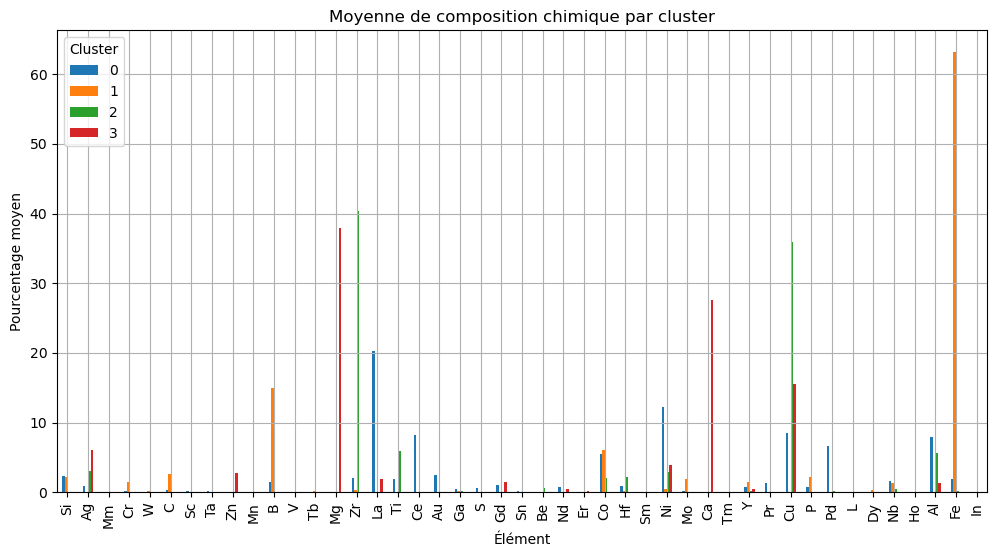

In [5]:
# Les analyses post-clustering 

#1.Détermination des éléments dominants dans chaque cluster 
chemical_means = df.groupby("Cluster")[element_columns].mean()
chemical_means.T.plot(kind='bar', figsize=(12,6))
plt.title("Moyenne de composition chimique par cluster")
plt.xlabel("Élément")
plt.ylabel("Pourcentage moyen")
plt.grid(True)
plt.show()

#Ici on remarque que Fe est dominant dans le deuxieme cluster 

In [6]:
# 2.Silhouette score (qualité du clustering) 
# plus proche de 1 = meilleur regroupement / Plus proche de 0 = clusters mal séparés
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df["Cluster"])
print(f"Silhouette score : {score:.3f}")

Silhouette score : 0.411


In [11]:
#3.la moyenne des propriétés physiques (Tg, Tx, Tl, Dmax) pour chacun des 4 clusters
print(df.groupby("Cluster")[["Tg", "Tx", "Tl", "Dmax"]].mean())

                 Tg          Tx           Tl      Dmax
Cluster                                               
0        543.431707  592.521341   951.462805  6.069207
1        829.468919  881.531081  1409.436486  3.005743
2        685.213592  748.543689  1166.932039  7.550971
3        415.361582  453.028249   761.943503  3.553672


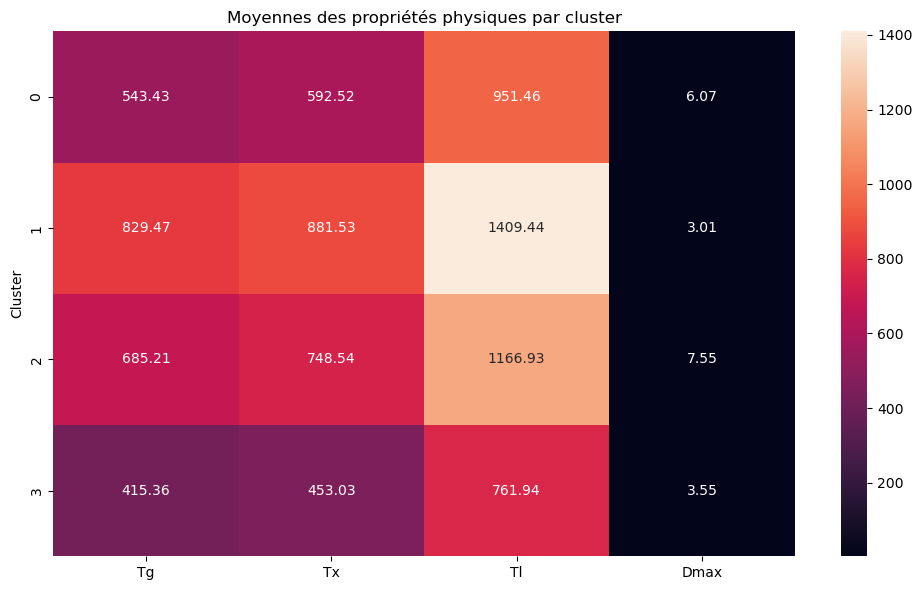

In [14]:
# Visualisation des moyennes des proprietes physiques
import seaborn as sns
import matplotlib.pyplot as plt

df_grouped = df.groupby("Cluster")[["Tg", "Tx", "Tl", "Dmax"]].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(df_grouped, annot=True, fmt=".2f")
plt.title("Moyennes des propriétés physiques par cluster")
plt.tight_layout()
plt.show()